# Итоговая работа.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from scipy.stats import norm
%matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [187]:
### YOUR CODE HERE
def f(x):
    arg = np.sin(x) + np.cos(2*x + 3)
    f1 = 2 * np.tan(arg)
    f2 = 1 / (np.cos(arg)**2)
    f3 = np.cos(x) - 2 * np.sin(2*x + 3)
    return f1 * f2 * f3

print(f"Значение производной функции в точке 1 f'(x) = {round(f(1), 4)}")

Значение производной функции в точке 1 f'(x) = 55.3859


## Задание 2

Дан объект в $2D$ пространстве

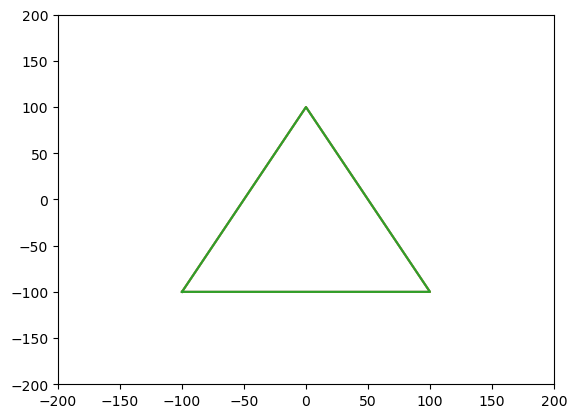

In [7]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 
plt.show()

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


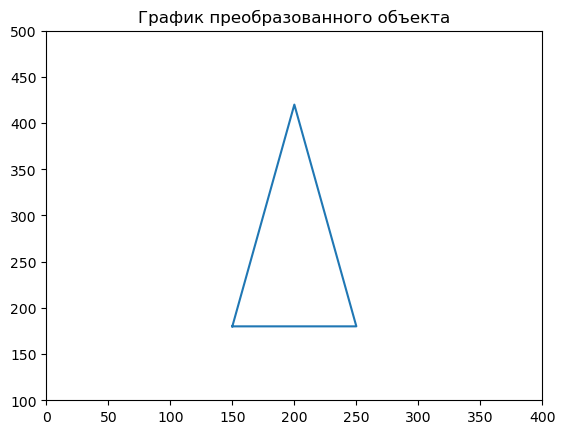

In [107]:
### YOUR CODE HERE
B_scale = np.array(
    [
    [0.5, 0,   0],
    [0,   1.2, 0],
    [0,   0,   1]
    ])

B_shift = np.array(
    [
    [1, 0, 200],
    [0, 1, 300],
    [0, 0, 1]
    ])

def transform_matrix(a, b):
    res = b @ a.transpose()
    return res.transpose()

A_scale = transform_matrix(A, B_scale)
A_scale_shift = transform_matrix(A_scale, B_shift)

x = A_scale_shift[:, 0]
y = A_scale_shift[:, 1]

plt.title('График преобразованного объекта')
plt.plot(x, y)
plt.ylim([100, 500])
plt.xlim([0, 400]) 
plt.show()

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [42]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [52]:
### YOUR CODE HERE
# Посчитаем собственные векторы и собственные значения матрицы
D, S = np.linalg.eig(m)

# Для матрицного разложения нам нужно:
# - Матрица из собственных векторов (уже получена - S)
# - Диагональная матрица с собственными значениями на диагонали
D = np.diag(D)

# - Матрица, обратная матрице с собственными векторами
S_inv = np.linalg.inv(S)

# Итого при спектральном разложении получили 3 матрицы:
print(f'Матрица из собственных векторов:\n {S}')
print(f'Матрица из собственных значений:\n {D}')
print(f'Обратная матрица из собственных векторов:\n {S_inv}')

# Проверим, что при умножении трех матриц получим исходную матрицу:
M = S @ D @ S_inv
print(f'\nПолучили исходную матрицу:\n {M}')

Матрица из собственных векторов:
 [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]
Матрица из собственных значений:
 [[ 3.  0.]
 [ 0. -1.]]
Обратная матрица из собственных векторов:
 [[ 0.55901699  1.11803399]
 [-0.55901699  1.11803399]]

Получили исходную матрицу:
 [[1. 4.]
 [1. 1.]]


## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [109]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [110]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

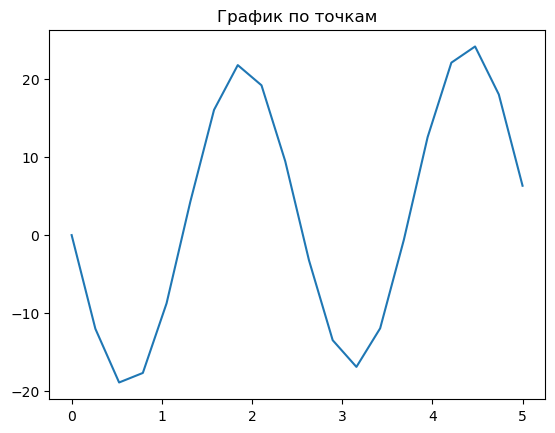

In [112]:
plt.title('График по точкам')
plt.plot(x, fx)
plt.show()

In [113]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [133]:
### YOUR CODE HERE
method_list = ['lm', 'trf', 'dogbox']
# Присвоим начальное значение функции ошибки, как функцию с единичными параметрами
min_diff = error([1, 1])

### YOUR CODE HERE
# Заложим 100 попыток на поиск оптимальных коэффициентов
for rep in range(100):
    # Подберем начальные коэффициенты из диапазона случайных чисел от -4 до 4
    a0, b0 = np.random.uniform(-4, 4, 2)
    # Переберем все методы
    for method_type in method_list:
        # Вычислим коэффициенты
        res = curve_fit(f, 
                        x, fx, 
                        p0 = [a0, b0], 
                        method = method_type, 
                        maxfev = 10**4 # Искусственно увеличим кол-во попыток поиска
                       )
        
        # Для расчета меры схожести графиков функции и графика по точкам вычислим функцию ошибки при найденных параметрах
        if error(res[0]) < min_diff:
            # Зафиксируем минимальные значения коэффициентов
            min_diff = error(res[0])
            a = res[0][0]
            b = res[0][1]

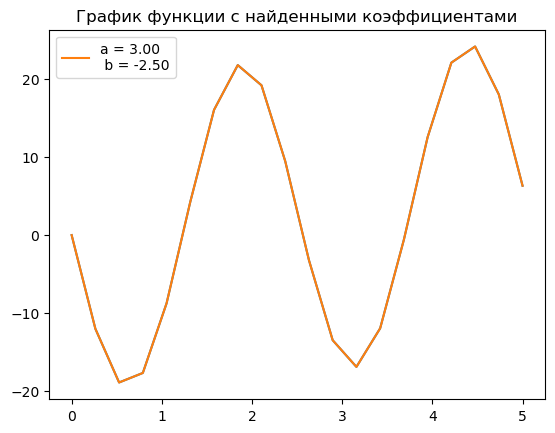

In [135]:
plt.title('График функции с найденными коэффициентами')
plt.plot(x, fx)
plt.plot(x, f(x, res[0][0], res[0][1]), label = f'a = {a:.2f}\n b = {b:.2f}')
plt.legend()
plt.show()

Из графика выше видно, что он практически совпадает с графиком, построенным по точкам. <br>
Искомая функция: $e^3 + sin(2.5x) + x$

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [5]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [184]:
### YOUR CODE HERE

for i in range(len(raitings)):
    # Присвоим начальное значение косинусному расстоянию для сравнения
    max_cosine = 0
   
    # Для каждого пользователя пробежимся по остальным для расчета косинусного расстояния
    a = raitings[i]
    for j in range(len(raitings)):
    
        # Нет смысла сравнивать одного и того же пользователя:
        if i == j: continue
        
        b = raitings[j]
        cosine_similarity = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
        # Ищем минимальное расстояние и фиксируем номер пользователя для него
        if cosine_similarity >= max_cosine:
            max_cosine = cosine_similarity
            max_j = j
            
    print(f'Пользователю x = {i} наиболее соответствует пользователь y = {max_j};')

Пользователю x = 0 наиболее соответствует пользователь y = 8;
Пользователю x = 1 наиболее соответствует пользователь y = 4;
Пользователю x = 2 наиболее соответствует пользователь y = 9;
Пользователю x = 3 наиболее соответствует пользователь y = 9;
Пользователю x = 4 наиболее соответствует пользователь y = 8;
Пользователю x = 5 наиболее соответствует пользователь y = 9;
Пользователю x = 6 наиболее соответствует пользователь y = 3;
Пользователю x = 7 наиболее соответствует пользователь y = 5;
Пользователю x = 8 наиболее соответствует пользователь y = 0;
Пользователю x = 9 наиболее соответствует пользователь y = 2;


In [1]:
from sklearn.metrics import pairwise_distances

In [22]:
for i, vector in enumerate(pairwise_distances(raitings, metric = 'cosine')):
    print(i, list(vector).index(np.min(vector[np.nonzero(vector)])))

0 8
1 4
2 9
3 9
4 8
5 9
6 3
7 5
8 0
9 2
